# Demographics Analysis  
  

#### Notebook objectives:  
- Statistical analysis of demographic variables:
  - age
  - sex assigned at birth  
  - author
  - author behavioral categories (e.g. anonymous vs non-anonymous posting, frequent poster vs one-time poster, etc.)

#### Steps:  
1. [Load the data](#Load-the-data)
2. [Age analysis](#Age-analysis)  

In [411]:
%run notebook_setup.ipynb

DATA_PATH='data/'
OUTPUT_PATH='output/'


num_freq_plot(df, field, color='')
cat_freq_plot(df, field, categories_ordered_list, color='')


## Load the data

In [231]:
df = pd.read_csv(
    DATA_PATH + 'reddit_askdocs_submissions_2017_to_20220121_analysis_ds.zip',
    parse_dates=['created_utc_ns_dt'],
    low_memory=False
)

In [232]:
df.head()

,author,num_comments,full_post_text,created_utc_ns_dt,age,sex,url
0,DavisTheMagicSheep,2,My ears feel like there is pressure inside of ...,2017-12-31 23:43:19,NaN,NaN,https://www.reddit.com/r/AskDocs/comments/7nbu...
1,Dontgetscooped,1,IBS maybe? | (first about me : 32 white male 5...,2017-12-31 23:33:08,NaN,AMAB,https://www.reddit.com/r/AskDocs/comments/7nbs...
2,AveryFenix,7,Mole or scar? Should I be worried about melano...,2017-12-31 23:10:39,21.0,NaN,https://www.reddit.com/r/AskDocs/comments/7nbo...
3,LeftAl,5,Terbinafine 250mg oral tablets | I've been pre...,2017-12-31 22:04:03,NaN,NaN,https://www.reddit.com/r/AskDocs/comments/7nbb...
4,KingMoka,4,13.2 Testosterone Levels for a 19 Year Old Mal...,2017-12-31 21:53:21,19.0,NaN,https://www.reddit.com/r/AskDocs/comments/7nb9...


In [233]:
len(df)

492376

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492376 entries, 0 to 492375
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   author             492376 non-null  object        
 1   num_comments       492376 non-null  int64         
 2   full_post_text     492376 non-null  object        
 3   created_utc_ns_dt  492376 non-null  datetime64[ns]
 4   age                405967 non-null  float64       
 5   sex                306244 non-null  object        
 6   url                492376 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 26.3+ MB


In [235]:
df.describe(include='all')

,author,num_comments,full_post_text,created_utc_ns_dt,age,sex,url
count,492376,492376.000000,492376,492376,405967.000000,306244,492376
unique,312571,NaN,490450,NaN,NaN,2,492372
top,SensitiveBorder2,NaN,Mom is in the ICU after a brain hemorrhage str...,NaN,NaN,AMAB,https://www.reddit.com/r/KidneyStones/comments...
freq,274,NaN,14,NaN,NaN,166470,2
mean,NaN,3.877652,NaN,2020-03-10 15:29:36.459733760,25.022381,NaN,NaN
min,NaN,0.000000,NaN,2017-01-01 00:05:06,1.000000,NaN,NaN
25%,NaN,2.000000,NaN,2019-04-06 02:04:00.500000,19.000000,NaN,NaN
50%,NaN,2.000000,NaN,2020-05-27 07:54:11.500000,23.000000,NaN,NaN
75%,NaN,4.000000,NaN,2021-04-28 13:04:20.249999872,28.000000,NaN,NaN
max,NaN,6192.000000,NaN,2022-01-22 00:41:27,99.000000,NaN,NaN


## Age analysis

In [236]:
df['age'].describe()

count    405967.000000
mean         25.022381
std           9.470582
min           1.000000
25%          19.000000
50%          23.000000
75%          28.000000
max          99.000000
Name: age, dtype: float64

In [237]:
df['age'].mode()

0    20.0
Name: age, dtype: float64

In [238]:
df['age'].value_counts(dropna=False)

age
NaN     86409
20.0    27422
21.0    27218
22.0    26944
23.0    25181
        ...  
91.0       25
96.0       25
94.0       24
93.0       23
98.0       20
Name: count, Length: 100, dtype: int64

In [239]:
df['age'].value_counts(dropna=False, normalize=True)

age
NaN     0.175494
20.0    0.055693
21.0    0.055279
22.0    0.054722
23.0    0.051142
          ...   
91.0    0.000051
96.0    0.000051
94.0    0.000049
93.0    0.000047
98.0    0.000041
Name: proportion, Length: 100, dtype: float64

In [240]:
df['age'].value_counts(dropna=False, normalize=True).sort_index().head(50)

age
1.0     0.000944
2.0     0.001564
3.0     0.001596
4.0     0.001277
5.0     0.001708
6.0     0.000983
7.0     0.000821
8.0     0.000938
9.0     0.000721
10.0    0.001091
11.0    0.000865
12.0    0.001454
13.0    0.005220
14.0    0.011327
15.0    0.019223
16.0    0.027286
17.0    0.030812
18.0    0.049541
19.0    0.049738
20.0    0.055693
21.0    0.055279
22.0    0.054722
23.0    0.051142
24.0    0.047754
25.0    0.048368
26.0    0.038367
27.0    0.034455
28.0    0.031878
29.0    0.025994
30.0    0.030093
31.0    0.018815
32.0    0.017369
33.0    0.014156
34.0    0.011400
35.0    0.011552
36.0    0.007813
37.0    0.006278
38.0    0.006162
39.0    0.004734
40.0    0.005319
41.0    0.002612
42.0    0.002679
43.0    0.002011
44.0    0.001676
45.0    0.002177
46.0    0.001373
47.0    0.001430
48.0    0.001316
49.0    0.001223
50.0    0.002297
Name: proportion, dtype: float64

In [241]:
num_freq_plot(df, 'age')

Let's group ages into age group categories.

In [242]:
AGE_GROUPS_ORDERED_LIST = [
    {
        'label': 'children',
        'age_range': '< 13 years',
        'incusive_lb': 0,
        'inclusive_ub': 12
    },
    {
        'label': 'adolescents',
        'age_range': '13 - 17 years',
        'incusive_lb': 13,
        'inclusive_ub': 17
    },
    {
        'label': 'young adulthood',
        'age_range': '18 - 26 years',
        'incusive_lb': 18,
        'inclusive_ub': 26
    },
    {
        'label': '30-ish',
        'age_range': '27 - 34 years',
        'incusive_lb': 27,
        'inclusive_ub': 34
    },
    {
        'label': 'early middle age',
        'age_range': '35 - 44 years',
        'incusive_lb': 35,
        'inclusive_ub': 44
    },
    {
        'label': 'middle age',
        'age_range': '45 - 54 years',
        'incusive_lb': 45,
        'inclusive_ub': 54
    },
    {
        'label': 'late middle age',
        'age_range': '55 - 64 years',
        'incusive_lb': 55,
        'inclusive_ub': 64
    },
    {
        'label': 'older adults',
        'age_range': '>= 65 years',
        'incusive_lb': 65,
        'inclusive_ub': 200  # above max age limit
    },
    {
        'label': 'unknown' # this should always be last in this list
    }
]

In [243]:
def assign_age_group(age, age_groups_ordered_list):
    assigned_age_group = age_groups_ordered_list[-1]['label']
    
    for age_group in age_groups_ordered_list:
        if (not np.isnan(age)) and age <= age_group['inclusive_ub']:
            assigned_age_group = age_group['label'] + f" ({age_group['age_range']})"
            break
            
    return assigned_age_group

In [244]:
AGE_GROUPS_LABELS_W_AGE_RANGE_ORDERED_LIST = [
    assign_age_group(x.get('incusive_lb', np.nan), AGE_GROUPS_ORDERED_LIST)
    for x in AGE_GROUPS_ORDERED_LIST
]

AGE_GROUPS_LABELS_W_AGE_RANGE_ORDERED_LIST

['children (< 13 years)',
 'adolescents (13 - 17 years)',
 'young adulthood (18 - 26 years)',
 '30-ish (27 - 34 years)',
 'early middle age (35 - 44 years)',
 'middle age (45 - 54 years)',
 'late middle age (55 - 64 years)',
 'older adults (>= 65 years)',
 'unknown']

In [245]:
df['age_group'] = df['age'].apply(assign_age_group, args=(AGE_GROUPS_ORDERED_LIST,))

In [246]:
df[['age', 'age_group']].tail(20)

,age,age_group
492356,16.0,adolescents (13 - 17 years)
492357,18.0,young adulthood (18 - 26 years)
492358,31.0,30-ish (27 - 34 years)
492359,24.0,young adulthood (18 - 26 years)
492360,5.0,children (< 13 years)
492361,22.0,young adulthood (18 - 26 years)
492362,NaN,unknown
492363,33.0,30-ish (27 - 34 years)
492364,51.0,middle age (45 - 54 years)
492365,23.0,young adulthood (18 - 26 years)


In [247]:
df['age_group'].value_counts().reindex(AGE_GROUPS_LABELS_W_AGE_RANGE_ORDERED_LIST)

age_group
children (< 13 years)                 6875
adolescents (13 - 17 years)          46218
young adulthood (18 - 26 years)     221867
30-ish (27 - 34 years)               90676
early middle age (35 - 44 years)     25030
middle age (45 - 54 years)            6786
late middle age (55 - 64 years)       4537
older adults (>= 65 years)            3978
unknown                              86409
Name: count, dtype: int64

In [248]:
df['age_group'].value_counts(normalize=True)\
    .reindex(AGE_GROUPS_LABELS_W_AGE_RANGE_ORDERED_LIST)

age_group
children (< 13 years)               0.013963
adolescents (13 - 17 years)         0.093867
young adulthood (18 - 26 years)     0.450605
30-ish (27 - 34 years)              0.184160
early middle age (35 - 44 years)    0.050835
middle age (45 - 54 years)          0.013782
late middle age (55 - 64 years)     0.009215
older adults (>= 65 years)          0.008079
unknown                             0.175494
Name: proportion, dtype: float64

In [249]:
cat_freq_plot(df, 'age_group', AGE_GROUPS_LABELS_W_AGE_RANGE_ORDERED_LIST)

## Sex assigned at birth analysis

In [250]:
df['sex'].describe()

count     306244
unique         2
top         AMAB
freq      166470
Name: sex, dtype: object

In [251]:
df['sex'].value_counts(dropna=False)

sex
NaN     186132
AMAB    166470
AFAB    139774
Name: count, dtype: int64

In [252]:
df['sex'].value_counts(dropna=False, normalize=True)

sex
NaN     0.378028
AMAB    0.338095
AFAB    0.283877
Name: proportion, dtype: float64

In [253]:
df['sex'].fillna('unknown', inplace=True)

In [254]:
SEX_LABELS_ORDERED_LIST = ['AFAB', 'AMAB', 'unknown']

In [255]:
cat_freq_plot(df, 'sex', SEX_LABELS_ORDERED_LIST)

## Comparing age and sex

In [256]:
df.groupby('age_group')['sex'].value_counts(normalize=True)\
    .reindex(AGE_GROUPS_LABELS_W_AGE_RANGE_ORDERED_LIST, level=0)\
    .reindex(SEX_LABELS_ORDERED_LIST, level=1)

age_group                         sex    
children (< 13 years)             AFAB       0.281891
                                  AMAB       0.321891
                                  unknown    0.396218
adolescents (13 - 17 years)       AFAB       0.223160
                                  AMAB       0.455926
                                  unknown    0.320914
young adulthood (18 - 26 years)   AFAB       0.330671
                                  AMAB       0.383243
                                  unknown    0.286086
30-ish (27 - 34 years)            AFAB       0.342229
                                  AMAB       0.359742
                                  unknown    0.298028
early middle age (35 - 44 years)  AFAB       0.343628
                                  AMAB       0.369796
                                  unknown    0.286576
middle age (45 - 54 years)        AFAB       0.404657
                                  AMAB       0.311082
                                  unknow

In [257]:
df.groupby('age_group')['sex'].value_counts()\
    .reindex(AGE_GROUPS_LABELS_W_AGE_RANGE_ORDERED_LIST, level=0)\
    .reindex(SEX_LABELS_ORDERED_LIST, level=1)

age_group                         sex    
children (< 13 years)             AFAB        1938
                                  AMAB        2213
                                  unknown     2724
adolescents (13 - 17 years)       AFAB       10314
                                  AMAB       21072
                                  unknown    14832
young adulthood (18 - 26 years)   AFAB       73365
                                  AMAB       85029
                                  unknown    63473
30-ish (27 - 34 years)            AFAB       31032
                                  AMAB       32620
                                  unknown    27024
early middle age (35 - 44 years)  AFAB        8601
                                  AMAB        9256
                                  unknown     7173
middle age (45 - 54 years)        AFAB        2746
                                  AMAB        2111
                                  unknown     1929
late middle age (55 - 64 years)   AFAB  

In [258]:
pd.crosstab(df['age_group'], df['sex']).reindex(AGE_GROUPS_LABELS_W_AGE_RANGE_ORDERED_LIST)

sex,AFAB,AMAB,unknown
age_group,,,
children (< 13 years),1938,2213,2724
adolescents (13 - 17 years),10314,21072,14832
young adulthood (18 - 26 years),73365,85029,63473
30-ish (27 - 34 years),31032,32620,27024
early middle age (35 - 44 years),8601,9256,7173
middle age (45 - 54 years),2746,2111,1929
late middle age (55 - 64 years),1679,1554,1304
older adults (>= 65 years),1561,1259,1158
unknown,8538,11356,66515


In [259]:
pd.crosstab(
    df['age_group'], 
    df['sex'], 
    normalize=0, 
).reindex(AGE_GROUPS_LABELS_W_AGE_RANGE_ORDERED_LIST)

sex,AFAB,AMAB,unknown
age_group,,,
children (< 13 years),0.281891,0.321891,0.396218
adolescents (13 - 17 years),0.223160,0.455926,0.320914
young adulthood (18 - 26 years),0.330671,0.383243,0.286086
30-ish (27 - 34 years),0.342229,0.359742,0.298028
early middle age (35 - 44 years),0.343628,0.369796,0.286576
middle age (45 - 54 years),0.404657,0.311082,0.284262
late middle age (55 - 64 years),0.370068,0.342517,0.287415
older adults (>= 65 years),0.392408,0.316491,0.291101
unknown,0.098809,0.131421,0.769769


In [260]:
def cat_crosstab_freq_plot(
    df, 
    field_x, categories_ordered_list_field_x, 
    field_grp, categories_ordered_list_field_grp
):

    xtab = pd.crosstab(
        df[field_x], 
        df[field_grp], 
    ).reindex(categories_ordered_list_field_x)
    
    traces = []
    for i in categories_ordered_list_field_grp:
        trace = go.Bar(
            x=xtab.index,
            y=xtab[i],
            name=i
        ) 
        traces.append(trace)

    fig = go.Figure(traces)
    
        
    fig.update_yaxes(gridcolor='#eee', title='frequency', rangemode='tozero')
    fig.update_xaxes(rangemode='tozero')
    fig.update_layout(
        title=f'Crosstab frequency distribution of <b>{field_x}</b> by <b>{field_grp}</b>',
        legend_title_text=f'{field_grp}:',
        plot_bgcolor='#fff',
        height=400
    )

    return fig

In [261]:
cat_crosstab_freq_plot(
    df, 
    'age_group', AGE_GROUPS_LABELS_W_AGE_RANGE_ORDERED_LIST, 
    'sex', SEX_LABELS_ORDERED_LIST, 
)

In [262]:
cat_crosstab_freq_plot(
    df, 
    'sex', SEX_LABELS_ORDERED_LIST, 
    'age_group', AGE_GROUPS_LABELS_W_AGE_RANGE_ORDERED_LIST
)

In [352]:
def get_crosstab(df, row_field, col_field, 
                 row_field_categories_ordered_list, 
                 col_field_categories_ordered_list):
    
    '''Crosstabs normalized across all observations'''
    xtab = pd.crosstab(
        df[row_field], df[col_field], normalize=True, 
    ).reindex(row_field_categories_ordered_list)
    
    xtab = xtab[col_field_categories_ordered_list]
    
    return xtab

In [413]:
# Crosstabs normalized across all observations
xtab = get_crosstab(df, 'age_group', 'sex', 
                 AGE_GROUPS_LABELS_W_AGE_RANGE_ORDERED_LIST, 
                 SEX_LABELS_ORDERED_LIST)
xtab

sex,AFAB,AMAB,unknown
age_group,,,
children (< 13 years),0.003936,0.004495,0.005532
adolescents (13 - 17 years),0.020947,0.042797,0.030123
young adulthood (18 - 26 years),0.149002,0.172691,0.128912
30-ish (27 - 34 years),0.063025,0.066250,0.054885
early middle age (35 - 44 years),0.017468,0.018799,0.014568
middle age (45 - 54 years),0.005577,0.004287,0.003918
late middle age (55 - 64 years),0.003410,0.003156,0.002648
older adults (>= 65 years),0.003170,0.002557,0.002352
unknown,0.017340,0.023064,0.135090


In [416]:
def heatmap_pct(crosstab, 
                title='% frequency distribution', 
                size_inches=(8, 10),
                colormap='copper_r',
                decimals=1
               ):
    row_labels = crosstab.index.to_list()
    column_labels = crosstab.columns.to_list()
    pct = crosstab.values
    
    fig, ax = plt.subplots(figsize=size_inches)
    im = ax.imshow(pct, cmap=colormap)
    
    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(column_labels)), labels=column_labels)
    ax.set_yticks(np.arange(len(row_labels)), labels=row_labels)
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    # Loop over data dimensions and create text annotations.
    for i in range(len(row_labels)):
        for j in range(len(column_labels)):
            text = ax.text(j, i, round(pct[i, j]*100, decimals), ha="center", va="center", color="w")
    
    ax.set_title(title)
    fig.tight_layout()
    plt.show()

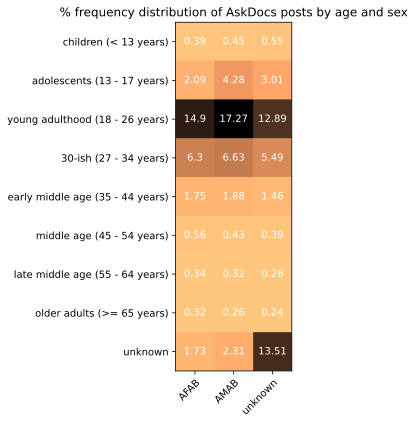

In [421]:
heatmap_pct(
    xtab, 
    title='% frequency distribution of AskDocs posts by age and sex', 
    size_inches=(5, 6),
    decimals=2
)

## Author

In [265]:
df['author'].describe()

count               492376
unique              312571
top       SensitiveBorder2
freq                   274
Name: author, dtype: object

In [266]:
len(df[df['author'].isna()])

0

In [267]:
df['author'].value_counts()

author
SensitiveBorder2       274
[deleted]              274
Help_Me_Reddit01       218
throwlega              149
Docquest117            139
                      ... 
skylerwhiteisawhore      1
Stephane69               1
logany56                 1
novel_airline            1
nominsinjun              1
Name: count, Length: 312571, dtype: int64

In [268]:
df['author'].value_counts(normalize=True)

author
SensitiveBorder2       0.000556
[deleted]              0.000556
Help_Me_Reddit01       0.000443
throwlega              0.000303
Docquest117            0.000282
                         ...   
skylerwhiteisawhore    0.000002
Stephane69             0.000002
logany56               0.000002
novel_airline          0.000002
nominsinjun            0.000002
Name: proportion, Length: 312571, dtype: float64

In [269]:
author_vc = df['author'].value_counts().reset_index()
author_vc.head()

,author,count
0,SensitiveBorder2,274
1,[deleted],274
2,Help_Me_Reddit01,218
3,throwlega,149
4,Docquest117,139


In [270]:
author_posts_count_vc = author_vc['count'].value_counts(normalize=True).sort_index()\
    .reset_index()
author_posts_count_vc.rename(
    columns={'count': 'author_posts_count'},
    inplace=True
)
author_posts_count_vc.head(10)

,author_posts_count,proportion
0,1,0.761245
1,2,0.137764
2,3,0.044511
3,4,0.020226
4,5,0.011121
5,6,0.006734
6,7,0.004482
7,8,0.002972
8,9,0.002102
9,10,0.001462


In [271]:
traces = []
trace = go.Scatter(
    x=author_posts_count_vc['author_posts_count'],
    y=author_posts_count_vc['proportion'],
    mode='markers'
)
traces.append(trace)
fig = go.Figure(traces)

    
fig.update_yaxes(gridcolor='#eee', title='proportion', rangemode='tozero')
fig.update_xaxes(title='author posts count', rangemode='tozero')
fig.update_layout(
    title=f'<b>Author posts count</b> frequency plot',
    plot_bgcolor='#fff',
    showlegend=False,
    height=400
)

fig.show()

Let's create author categories based on how often they post.

In [272]:
POSTING_FREQ_GROUPS_ORDERED_LIST = [
    {
        'label': 'one-time poster',
        'incusive_lb': 1,
        'inclusive_ub': 1
    },
    {
        'label': 'posted 2-3 times',
        'incusive_lb': 2,
        'inclusive_ub': 3
    },
    {
        'label': 'posted 4-10 times',
        'incusive_lb': 4,
        'inclusive_ub': 10
    },
    {
        'label': 'posted 11-50 times',
        'incusive_lb': 11,
        'inclusive_ub': 50
    },
    {
        'label': 'posted 51-100 times',
        'incusive_lb': 51,
        'inclusive_ub': 100
    },
    {
        'label': 'posted 101-200 times',
        'incusive_lb': 101,
        'inclusive_ub': 200
    },
    {
        'label': 'posted over 200 times',
        'incusive_lb': 201,
        'inclusive_ub': 100_000_000  # above expected max limit
    },
]

In [273]:
POSTING_FREQ_GROUPS_ORDERED_LIST

[{'label': 'one-time poster', 'incusive_lb': 1, 'inclusive_ub': 1},
 {'label': 'posted 2-3 times', 'incusive_lb': 2, 'inclusive_ub': 3},
 {'label': 'posted 4-10 times', 'incusive_lb': 4, 'inclusive_ub': 10},
 {'label': 'posted 11-50 times', 'incusive_lb': 11, 'inclusive_ub': 50},
 {'label': 'posted 51-100 times', 'incusive_lb': 51, 'inclusive_ub': 100},
 {'label': 'posted 101-200 times', 'incusive_lb': 101, 'inclusive_ub': 200},
 {'label': 'posted over 200 times',
  'incusive_lb': 201,
  'inclusive_ub': 100000000}]

In [274]:
def assign_posting_freq_group(posting_freq, posting_freq_groups_ordered_list):
    assigned_posting_freq_group = ''
    
    for posting_freq_group in posting_freq_groups_ordered_list:
        if (
            (not np.isnan(posting_freq)) 
            and posting_freq <= posting_freq_group['inclusive_ub']
        ):
            assigned_posting_freq_group = posting_freq_group['label']
            break
            
    return assigned_posting_freq_group

In [275]:
POSTING_FREQ_GROUPS_LABELS_ORDERED_LIST = [
    x['label'] for x in POSTING_FREQ_GROUPS_ORDERED_LIST
]

POSTING_FREQ_GROUPS_LABELS_ORDERED_LIST

['one-time poster',
 'posted 2-3 times',
 'posted 4-10 times',
 'posted 11-50 times',
 'posted 51-100 times',
 'posted 101-200 times',
 'posted over 200 times']

In [276]:
author_vc['author_posting_freq_group'] = author_vc['count'].apply(
    assign_posting_freq_group, 
    args=(POSTING_FREQ_GROUPS_ORDERED_LIST,)
)

In [277]:
author_vc.head(20)

,author,count,author_posting_freq_group
0,SensitiveBorder2,274,posted over 200 times
1,[deleted],274,posted over 200 times
2,Help_Me_Reddit01,218,posted over 200 times
3,throwlega,149,posted 101-200 times
4,Docquest117,139,posted 101-200 times
5,ukjungle,137,posted 101-200 times
6,dizson,134,posted 101-200 times
7,johndoejohndoes,129,posted 101-200 times
8,__throwawaypt__,114,posted 101-200 times
9,meg-c,103,posted 101-200 times


In [278]:
len(df)

492376

In [279]:
df = df.merge(author_vc[['author', 'author_posting_freq_group']], on='author')
df.head()

,author,num_comments,full_post_text,created_utc_ns_dt,age,sex,url,age_group,author_posting_freq_group
0,DavisTheMagicSheep,2,My ears feel like there is pressure inside of ...,2017-12-31 23:43:19,NaN,unknown,https://www.reddit.com/r/AskDocs/comments/7nbu...,unknown,posted 2-3 times
1,DavisTheMagicSheep,1,(16m) extreme anxiety issues and rib cage look...,2018-09-15 01:45:42,16.0,unknown,https://www.reddit.com/r/AskDocs/comments/9fxs...,adolescents (13 - 17 years),posted 2-3 times
2,DavisTheMagicSheep,1,M16 clogged nose and blurry left eye | For the...,2018-10-02 20:55:53,16.0,AMAB,https://www.reddit.com/r/AskDocs/comments/9kuj...,adolescents (13 - 17 years),posted 2-3 times
3,Dontgetscooped,1,IBS maybe? | (first about me : 32 white male 5...,2017-12-31 23:33:08,NaN,AMAB,https://www.reddit.com/r/AskDocs/comments/7nbs...,unknown,one-time poster
4,AveryFenix,7,Mole or scar? Should I be worried about melano...,2017-12-31 23:10:39,21.0,unknown,https://www.reddit.com/r/AskDocs/comments/7nbo...,young adulthood (18 - 26 years),posted 2-3 times


In [280]:
cat_freq_plot(df, 'author_posting_freq_group', POSTING_FREQ_GROUPS_LABELS_ORDERED_LIST)

In [281]:
cat_crosstab_freq_plot(
    df, 
    'author_posting_freq_group', POSTING_FREQ_GROUPS_LABELS_ORDERED_LIST, 
    'sex', SEX_LABELS_ORDERED_LIST, 
)

In [422]:
# Crosstabs normalized across all observations
xtab2 = get_crosstab(df, 'age_group', 'author_posting_freq_group', 
                 AGE_GROUPS_LABELS_W_AGE_RANGE_ORDERED_LIST, 
                 POSTING_FREQ_GROUPS_LABELS_ORDERED_LIST)
xtab2

author_posting_freq_group,one-time poster,posted 2-3 times,posted 4-10 times,posted 11-50 times,posted 51-100 times,posted 101-200 times,posted over 200 times
age_group,,,,,,,
children (< 13 years),0.007074,0.003625,0.002332,0.000839,0.000061,0.000016,0.000016
adolescents (13 - 17 years),0.048936,0.024857,0.014595,0.005396,0.000045,0.000002,0.000037
young adulthood (18 - 26 years),0.211716,0.116385,0.079039,0.037504,0.003599,0.001176,0.001186
30-ish (27 - 34 years),0.085676,0.047464,0.032847,0.016307,0.001676,0.000130,0.000061
early middle age (35 - 44 years),0.024378,0.013244,0.008733,0.003883,0.000583,0.000002,0.000012
middle age (45 - 54 years),0.007112,0.003654,0.002167,0.000790,0.000051,0.000004,0.000004
late middle age (55 - 64 years),0.004574,0.002386,0.001645,0.000554,0.000047,0.000004,0.000004
older adults (>= 65 years),0.004245,0.002033,0.001255,0.000516,0.000024,0.000004,0.000002
unknown,0.089543,0.046034,0.025998,0.012033,0.001152,0.000500,0.000234


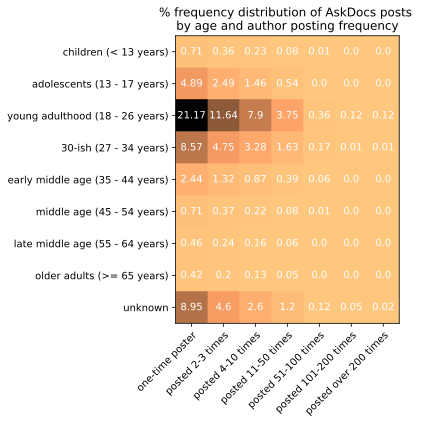

In [426]:
heatmap_pct(
    xtab2, 
    title='% frequency distribution of AskDocs posts \nby age and author posting frequency', 
    size_inches=(6,6),
    decimals=2
)

In [427]:
def get_demog_crosstab(df, col_field, col_field_categories_ordered_list):
    '''Crosstabs with patient age_group and sex as rows, 
    values normalized across all observations'''
    xtab = pd.crosstab(
        [df['age_group'], df['sex']], df[col_field], normalize=True, 
    ).reindex(AGE_GROUPS_LABELS_W_AGE_RANGE_ORDERED_LIST, level=0)\
        .reindex(SEX_LABELS_ORDERED_LIST, level=1)
    
    xtab = xtab[col_field_categories_ordered_list]
    
    return xtab

In [433]:
xtab3 = get_demog_crosstab(
    df, 
    'author_posting_freq_group', 
    POSTING_FREQ_GROUPS_LABELS_ORDERED_LIST
)
xtab3

author_posting_freq_group                 one-time poster  posted 2-3 times  \
age_group                        sex                                          
children (< 13 years)            AFAB            0.001848          0.001093   
                                 AMAB            0.002218          0.001188   
                                 unknown         0.003008          0.001345   
adolescents (13 - 17 years)      AFAB            0.010545          0.005993   
                                 AMAB            0.022800          0.010902   
                                 unknown         0.015592          0.007961   
young adulthood (18 - 26 years)  AFAB            0.066388          0.039289   
                                 AMAB            0.085343          0.043918   
                                 unknown         0.059985          0.033178   
30-ish (27 - 34 years)           AFAB            0.027544          0.016959   
                                 AMAB            0.033397          0.016987   
                                 unknown         0.024735          0.013518   
early middle age (35 - 44 years) AFAB            0.007953          0.004793   
                                 AMAB            0.009544          0.004592   
                                 unknown         0.006881          0.003859   
middle age (45 - 54 years)       AFAB            0.002669          0.001458   
                                 AMAB            0.002449          0.001160   
                                 unknown         0.001994          0.001036   
late middle age (55 - 64 years)  AFAB            0.001647          0.000932   
                                 AMAB            0.001641          0.000833   
                                 unknown         0.001286          0.000621   
older adults (>= 65 years)       AFAB            0.001645          0.000855   
                                 AMAB            0.001357          0.000630   
                                 unknown         0.001243          0.000548   
unknown                          AFAB            0.009308          0.004393   
                                 AMAB            0.012653          0.005524   
                                 unknown         0.067582          0.036117   

author_posting_freq_group                 posted 4-10 times  \
age_group                        sex                          
children (< 13 years)            AFAB              0.000749   
                                 AMAB              0.000741   
                                 unknown           0.000841   
adolescents (13 - 17 years)      AFAB              0.003436   
                                 AMAB              0.006335   
                                 unknown           0.004824   
young adulthood (18 - 26 years)  AFAB              0.029122   
                                 AMAB              0.027148   
                                 unknown           0.022769   
30-ish (27 - 34 years)           AFAB              0.012521   
                                 AMAB              0.010334   
                                 unknown           0.009992   
early middle age (35 - 44 years) AFAB              0.003241   
                                 AMAB              0.002955   
                                 unknown           0.002537   
middle age (45 - 54 years)       AFAB              0.001005   
                                 AMAB              0.000550   
                                 unknown           0.000611   
late middle age (55 - 64 years)  AFAB              0.000571   
                                 AMAB              0.000561   
                                 unknown           0.000514   
older adults (>= 65 years)       AFAB              0.000477   
                                 AMAB              0.000378   
                                 unknown           0.000400   
unknown                          AFAB              0.002478   
       

In [434]:
xtab3.index.to_flat_index().to_list()

[('children (< 13 years)', 'AFAB'),
 ('children (< 13 years)', 'AMAB'),
 ('children (< 13 years)', 'unknown'),
 ('adolescents (13 - 17 years)', 'AFAB'),
 ('adolescents (13 - 17 years)', 'AMAB'),
 ('adolescents (13 - 17 years)', 'unknown'),
 ('young adulthood (18 - 26 years)', 'AFAB'),
 ('young adulthood (18 - 26 years)', 'AMAB'),
 ('young adulthood (18 - 26 years)', 'unknown'),
 ('30-ish (27 - 34 years)', 'AFAB'),
 ('30-ish (27 - 34 years)', 'AMAB'),
 ('30-ish (27 - 34 years)', 'unknown'),
 ('early middle age (35 - 44 years)', 'AFAB'),
 ('early middle age (35 - 44 years)', 'AMAB'),
 ('early middle age (35 - 44 years)', 'unknown'),
 ('middle age (45 - 54 years)', 'AFAB'),
 ('middle age (45 - 54 years)', 'AMAB'),
 ('middle age (45 - 54 years)', 'unknown'),
 ('late middle age (55 - 64 years)', 'AFAB'),
 ('late middle age (55 - 64 years)', 'AMAB'),
 ('late middle age (55 - 64 years)', 'unknown'),
 ('older adults (>= 65 years)', 'AFAB'),
 ('older adults (>= 65 years)', 'AMAB'),
 ('older adu

In [ ]:
#HERE

In [435]:
xtab3.index = xtab3.index.to_flat_index()
xtab3

author_posting_freq_group,one-time poster,posted 2-3 times,posted 4-10 times,posted 11-50 times,posted 51-100 times,posted 101-200 times,posted over 200 times
"(children (< 13 years), AFAB)",0.001848,0.001093,0.000749,0.000227,0.000016,0.000000,0.000002
"(children (< 13 years), AMAB)",0.002218,0.001188,0.000741,0.000307,0.000020,0.000006,0.000014
"(children (< 13 years), unknown)",0.003008,0.001345,0.000841,0.000305,0.000024,0.000010,0.000000
"(adolescents (13 - 17 years), AFAB)",0.010545,0.005993,0.003436,0.000959,0.000004,0.000002,0.000008
"(adolescents (13 - 17 years), AMAB)",0.022800,0.010902,0.006335,0.002717,0.000024,0.000000,0.000018
"(adolescents (13 - 17 years), unknown)",0.015592,0.007961,0.004824,0.001720,0.000016,0.000000,0.000010
"(young adulthood (18 - 26 years), AFAB)",0.066388,0.039289,0.029122,0.012590,0.000680,0.000479,0.000453
"(young adulthood (18 - 26 years), AMAB)",0.085343,0.043918,0.027148,0.013321,0.001852,0.000481,0.000628
"(young adulthood (18 - 26 years), unknown)",0.059985,0.033178,0.022769,0.011593,0.001066,0.000215,0.000106
"(30-ish (27 - 34 years), AFAB)",0.027544,0.016959,0.012521,0.005435,0.000542,0.000004,0.000020


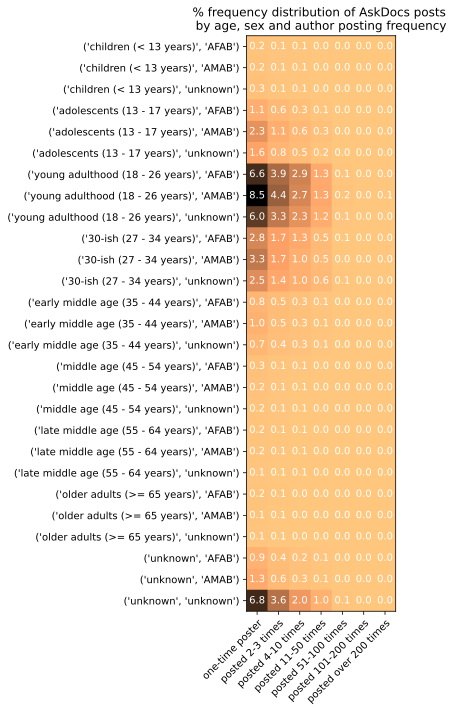

In [439]:
heatmap_pct(
    xtab3, 
    title='% frequency distribution of AskDocs posts \nby age, sex and author posting frequency', 
    size_inches=(7,10),
    decimals=1
)

## Author anonymity

In [319]:
len(df)

492376

In [318]:
len(df[df['author'].str.contains('throwaway', case=False)])

15815

In [325]:
len(df[df['author'].str.contains('throw.*away', case=False)])

17223

In [326]:
df[df['author'].str.contains('throw.+away', case=False)]

,author,num_comments,full_post_text,created_utc_ns_dt,age,sex,url,age_group,author_posting_freq_group
1163,throwmeawayforgood_,2,Patches of red bumps appearing on torso. | I a...,2017-12-29 00:22:31,25.0,AMAB,https://www.reddit.com/r/AskDocs/comments/7mqo...,young adulthood (18 - 26 years),one-time poster
1474,throwinitaway3334,3,[NSFW] What is this pimple-like thing near my ...,2017-12-28 05:43:17,18.0,AMAB,https://www.reddit.com/r/AskDocs/comments/7mkq...,young adulthood (18 - 26 years),one-time poster
1831,legsthrowsaways,9,17m is this normal? I like to see people in pa...,2017-12-27 08:01:07,17.0,unknown,https://www.reddit.com/r/AskDocs/comments/7mdq...,adolescents (13 - 17 years),one-time poster
2789,throwingthisAway9951,4,"Difficulty starting to urine. | Hello,\n\nI am...",2017-12-24 09:00:17,22.0,AMAB,https://www.reddit.com/r/AskDocs/comments/7lu9...,young adulthood (18 - 26 years),one-time poster
2912,throw-health-away,2,GI abnormalities and skin/bladder issues. Plea...,2017-12-24 00:09:12,23.0,AMAB,https://www.reddit.com/r/AskDocs/comments/7ls0...,young adulthood (18 - 26 years),one-time poster
...,...,...,...,...,...,...,...,...,...
489849,Throwerawayer121,1,"26M, change in body function over several year...",2022-01-10 08:48:02,26.0,AMAB,https://www.reddit.com/r/AskDocs/comments/s0fh...,young adulthood (18 - 26 years),one-time poster
490058,throw_away708,1,[16F] Red/brownish armpit rash | I notice that...,2022-01-09 17:17:23,16.0,AFAB,https://www.reddit.com/r/AskDocs/comments/rzwd...,adolescents (13 - 17 years),one-time poster
490231,Throw_itaway_444,1,I Think I have a hemorrhoid for the first time...,2022-01-09 00:30:03,26.0,AMAB,https://www.reddit.com/r/AskDocs/comments/rzen...,young adulthood (18 - 26 years),one-time poster
490454,throwthrowawayawayw,1,Likelihood of false negative pregnancy test re...,2022-01-08 04:24:52,22.0,AFAB,https://www.reddit.com/r/AskDocs/comments/ryr8...,young adulthood (18 - 26 years),one-time poster


In [332]:
def assign_anonymity_group(author):
    anonymity_group = 'regular account'

    if author == '[deleted]':
        anonymity_group = 'deleted account'
    elif re.search(r'throw.*away', author, flags=re.IGNORECASE):
        anonymity_group = 'throwaway account'

    return anonymity_group
    

In [343]:
df['anonymity_group'] = df['author'].apply(assign_anonymity_group)

df[['author', 'anonymity_group']].tail(30)

,author,anonymity_group
492346,Fine-Philosophing,regular account
492347,h3lpthe,regular account
492348,cestmeridiem,regular account
492349,ZombieViolinist,regular account
492350,ThrowAwayCauseISaySo,throwaway account
492351,anm89,regular account
492352,TheQuietRide,regular account
492353,Arkdelb,regular account
492354,Ok_Ambassador646,regular account
492355,badtimesbear,regular account


In [344]:
df['anonymity_group'].value_counts(dropna=False, normalize=True)

anonymity_group
regular account      0.964464
throwaway account    0.034979
deleted account      0.000556
Name: proportion, dtype: float64

In [345]:
ANONYMITY_GROUPS_LABELS_ORDERED_LIST = [
    'regular account',
    'throwaway account',
    'deleted account'
]

In [346]:
cat_freq_plot(df, 'anonymity_group', ANONYMITY_GROUPS_LABELS_ORDERED_LIST)

In [440]:
#HERE
xtab4 = get_demog_crosstab(
    df, 
    'anonymity_group', 
    ANONYMITY_GROUPS_LABELS_ORDERED_LIST
)
xtab4

anonymity_group                           regular account  throwaway account  \
age_group                        sex                                           
children (< 13 years)            AFAB            0.003875           0.000059   
                                 AMAB            0.004436           0.000055   
                                 unknown         0.005415           0.000118   
adolescents (13 - 17 years)      AFAB            0.019916           0.001024   
                                 AMAB            0.040932           0.001846   
                                 unknown         0.028836           0.001277   
young adulthood (18 - 26 years)  AFAB            0.142840           0.006095   
                                 AMAB            0.166103           0.006495   
                                 unknown         0.123771           0.005073   
30-ish (27 - 34 years)           AFAB            0.061128           0.001877   
                                 AMAB            0.064047           0.002195   
                                 unknown         0.053205           0.001649   
early middle age (35 - 44 years) AFAB            0.017048           0.000418   
                                 AMAB            0.018250           0.000544   
                                 unknown         0.014162           0.000400   
middle age (45 - 54 years)       AFAB            0.005413           0.000162   
                                 AMAB            0.004194           0.000093   
                                 unknown         0.003873           0.000045   
late middle age (55 - 64 years)  AFAB            0.003337           0.000073   
                                 AMAB            0.003087           0.000067   
                                 unknown         0.002594           0.000053   
older adults (>= 65 years)       AFAB            0.003118           0.000053   
                                 AMAB            0.002510           0.000047   
                                 unknown         0.002323           0.000028   
unknown                          AFAB            0.016676           0.000644   
                                 AMAB            0.022266           0.000782   
                                 unknown         0.131111           0.003806   

anonymity_group                           deleted account  
age_group                        sex                       
children (< 13 years)            AFAB            0.000002  
                                 AMAB            0.000004  
                                 unknown         0.000000  
adolescents (13 - 17 years)      AFAB            0.000008  
                                 AMAB            0.000018  
                                 unknown         0.000010  
young adulthood (18 - 26 years)  AFAB            0.000067  
                                 AMAB            0.000093  
                                 unknown         0.000067  
30-ish (27 - 34 years)           AFAB            0.000020  
                                 AMAB            0.000008  
                                 unknown         0.000030  
early middle age (35 - 44 years) AFAB            0.000002  
                                 AMAB            0.000004  
                                 unknown         0.000006  
middle age (45 - 54 years)       AFAB            0.000002  
                                 AMAB            0.000000  
                                 unknown         0.000000  
late middle age (55 - 64 years)  AFAB            0.000000  
                                 AMAB            0.000002  
                                 unknown         0.000002  
older adults (>= 65 years)       AFAB            0.000000  
                                 AMAB            0.000000  
                                 unknown         0.000000  
unknown                          AFAB            0.000020  
                                 AMAB            0.000016  

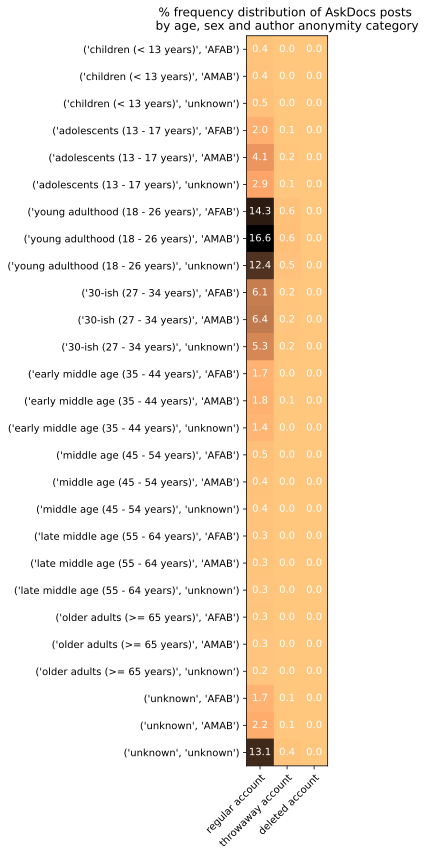

In [447]:
xtab4.index = xtab4.index.to_flat_index()

heatmap_pct(
    xtab4, 
    title='% frequency distribution of AskDocs posts \nby age, sex and author anonymity category', 
    size_inches=(7,12),
    decimals=1
)

In [448]:
xtab5 = get_crosstab(df, 'author_posting_freq_group', 'anonymity_group', 
                 POSTING_FREQ_GROUPS_LABELS_ORDERED_LIST, 
                 ANONYMITY_GROUPS_LABELS_ORDERED_LIST)
xtab5

anonymity_group,regular account,throwaway account,deleted account
author_posting_freq_group,,,
one-time poster,0.462856,0.020399,0.000000
posted 2-3 times,0.251749,0.007933,0.000000
posted 4-10 times,0.164362,0.004249,0.000000
posted 11-50 times,0.075656,0.002167,0.000000
posted 51-100 times,0.007236,0.000000,0.000000
posted 101-200 times,0.001606,0.000232,0.000000
posted over 200 times,0.000999,0.000000,0.000556


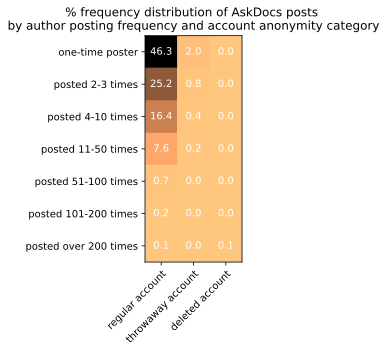

In [449]:
heatmap_pct(
    xtab5, 
    title='% frequency distribution of AskDocs posts \nby author posting frequency and account anonymity category', 
    size_inches=(5, 5)
)